# Simple Linear Regression

### California Test Score Data Set

The California Standardized Testing and Reporting data set contains data on test performance, school characteristics, and student demographic backgrounds. 

Test scores are the average of the reading and math scores. The student–teacher ratio used here is the number of students in the district divided by the number of full-time equivalent teachers.

The demographic variables include the percentage of students who are in the public assistance program CalWorks, the percentage of students who qualify for a reduced-price lunch, and the percentage of students who has English as a second language.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [1]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as smf

In [2]:
# Loading the data set

df = pd.read_excel("caschool.xlsx")
df

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


## OLS Estimator

First run the simple linear regression model

$$ TestScore_i = \beta_0 + \beta_1 STR_i + u_i $$

In [20]:
# Regression formula where y = Test Score and X = Student-Teacher Ratio

formula = 'testscr ~ str'             

In [ ]:
# Running the regression

model = smf.ols(formula, df).fit()  

In [21]:
# Print out the result of the regression

print(model.summary())                 

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.78e-06
Time:                        21:17:42   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

The resulting estimated model is

$$ TestScore_i = 698.9 - 2.28 STR_i $$
$$ \hspace{0.5in}   (9.47) \hspace{0.15in} (0.48)$$

In [ ]:
# Creating the estimated regression line for Test Scores

y_hat = model.params.Intercept + model.params['str']*df.str
y_hat

<function matplotlib.pyplot.show(close=None, block=None)>

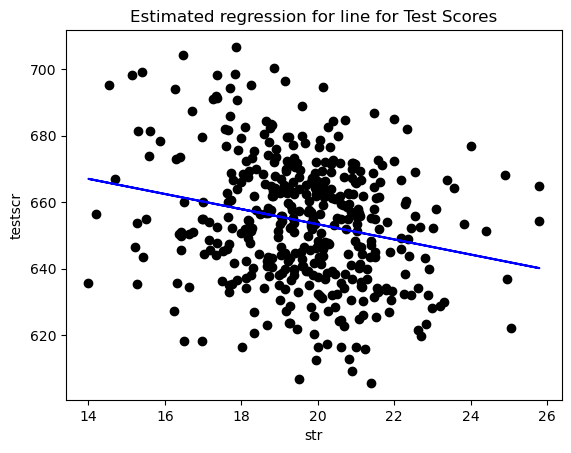

In [16]:
# Creating a scatterplot with both regression lines

plt.scatter(df.str,df.testscr,color='k')                             # Scatterplot: points in black
plt.plot(df.str,y_hat,color='b')                                     # Regression line in blue

plt.title("Estimated regression for line for Test Scores")           # Plot title
plt.xlabel("str")                                                    # Plot x-axis label
plt.ylabel("testscr")                                                # Plot y-axis label

plt.show